# Exploratory Data Analysis of Wine Data Set

### Import All Libraries, Open and Read Wine csv

In [52]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud
import ast
%matplotlib inline

wine = pd.read_csv('wine.csv', index_col=0)
wine.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la B√©gude


Let's have a look what's in this dataset.

In [64]:
print("There are {} observations and {} features in this dataset. \n".format(wine.shape[0],wine.shape[1]))

print("There are {} types of wine in this dataset such as {}... \n".format(len(wine.variety.unique()),
                                                                           ", ".join(wine.variety.unique()[0:5])))

print("There are {} countries producing wine in this dataset such as {}... \n".format(len(wine.country.unique()),
                                                                                      ", ".join(wine.country.unique()[0:5])))


There are 1103 observations and 10 features in this dataset. 

There are 124 types of wine in this dataset such as Cabernet Sauvignon, Tinta de Toro, Sauvignon Blanc, Pinot Noir, Provence red blend... 

There are 22 countries producing wine in this dataset such as US, Spain, France, Italy, New Zealand... 



From this we can see that the dataset is providing information on wine production countries, the areas within those countries where wine is produced and what types of wine is produced. 

## Remove columns without much value in terms of analysis

Some of these columns aren't extremely useful in terms of analysis when it comes to chart plotting so before going any further I'll remove these columns. 

In [22]:
wine.drop(['description','designation','winery'], axis=1, inplace=True)

In [23]:
wine.head()

,country,points,price,province,region_1,region_2,variety
0,US,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon
1,Spain,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro
2,US,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc
3,US,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir
4,France,95,66.0,Provence,Bandol,NaN,Provence red blend


## Drop any duplicate Rows

In [24]:
wine.drop_duplicates(keep='first',inplace=False)

,country,points,price,province,region_1,region_2,variety
0,US,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon
1,Spain,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro
2,US,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc
3,US,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir
4,France,95,66.0,Provence,Bandol,NaN,Provence red blend
...,...,...,...,...,...,...,...
1098,US,87,12.0,California,California,California Other,White Blend
1099,US,87,20.0,New York,Finger Lakes,Finger Lakes,Riesling
1100,US,87,28.0,Washington,Columbia Valley (WA),Columbia Valley,Merlot
1101,France,87,27.0,Bordeaux,Listrac-M√©doc,NaN,Bordeaux-style Red Blend


# Drop Any Null Columns 
Some of the columns contain null values so we'll use linear interpolation to fill in these values in the points and price column and replace the NaN values in the other columns with 'X'. 

In [68]:
wine['price'] = wine['price'].interpolate(method='linear')
wine['points'] = wine['points'].interpolate(method='linear')

In [26]:
wine['price'] = wine['price'].astype(str).astype(float)

In [27]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103 entries, 0 to 1102
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   1103 non-null   object 
 1   points    1103 non-null   int64  
 2   price     1103 non-null   float64
 3   province  1103 non-null   object 
 4   region_1  930 non-null    object 
 5   region_2  492 non-null    object 
 6   variety   1103 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 68.9+ KB


Let's check the data type of all the columns and see if any need to be changed. Let's convert the province to string type as we'll need that later for the word cloud. 

In [56]:
wine['province'] = wine['province'].astype(str)
wine['province']

0           California
1       Northern Spain
2           California
3               Oregon
4             Provence
             ...      
1098        California
1099          New York
1100        Washington
1101          Bordeaux
1102        California
Name: province, Length: 1103, dtype: object

In [29]:
wine.isnull().sum() * 100 / len(wine)

country      0.000000
points       0.000000
price        0.000000
province     0.000000
region_1    15.684497
region_2    55.394379
variety      0.000000
dtype: float64

Over 55% of the values in the region 2 column are null values, that makes it hard to perform any effective analysis on that column. For that reason I'll remove the region 2 column. As only 15% of region 1 values are null I'll replace these with 'X' for now and then omit those rows from any analysis I carry out later on. 

In [30]:
wine.drop('region_2', axis=1, inplace=True)

In [31]:
wine.head()

,country,points,price,province,region_1,variety
0,US,96,235.0,California,Napa Valley,Cabernet Sauvignon
1,Spain,96,110.0,Northern Spain,Toro,Tinta de Toro
2,US,96,90.0,California,Knights Valley,Sauvignon Blanc
3,US,96,65.0,Oregon,Willamette Valley,Pinot Noir
4,France,95,66.0,Provence,Bandol,Provence red blend


In [32]:
wine['region_1'] = wine['region_1'].fillna('X') 
wine['region_1'].isnull().sum()

0

Now we have cleaned up the dataset to only include relevent columns and we have dealt with all of the NaN values. Let's get on with the analysis. 

# Analysis

## Multi-Plot Grid

First let's filter the dataset to only contain the varieties "Cabernet Sauvignon", "Pinot Noir" and "Chardonnay" wines. 

In [33]:
new_df = wine.loc[(wine.variety == 'Cabernet Sauvignon') | (wine.variety == 'Pinot Noir') | (wine.variety == 'Chardonnay')]
new_df

,country,points,price,province,region_1,variety
0,US,96,235.0,California,Napa Valley,Cabernet Sauvignon
3,US,96,65.0,Oregon,Willamette Valley,Pinot Noir
8,US,95,65.0,Oregon,Chehalem Mountains,Pinot Noir
9,US,95,60.0,California,Sonoma Coast,Pinot Noir
11,US,95,48.0,Oregon,Ribbon Ridge,Pinot Noir
...,...,...,...,...,...,...
1081,US,87,38.0,California,Santa Ynez Valley,Cabernet Sauvignon
1082,US,87,14.0,New York,Finger Lakes,Chardonnay
1085,US,87,40.0,New York,Long Island,Cabernet Sauvignon
1089,US,87,25.0,New York,Finger Lakes,Cabernet Sauvignon


As there is 12 different countries, plotting this in a multi-plot grid would be cumbersome and difficult to visualise so I've decided to only plot the top three wine countries for wine production. 

In [34]:
country_df = new_df.loc[(new_df.country == 'US') | (new_df.country == 'France') | (new_df.country == 'Italy')]
country_df

,country,points,price,province,region_1,variety
0,US,96,235.0,California,Napa Valley,Cabernet Sauvignon
3,US,96,65.0,Oregon,Willamette Valley,Pinot Noir
8,US,95,65.0,Oregon,Chehalem Mountains,Pinot Noir
9,US,95,60.0,California,Sonoma Coast,Pinot Noir
11,US,95,48.0,Oregon,Ribbon Ridge,Pinot Noir
...,...,...,...,...,...,...
1081,US,87,38.0,California,Santa Ynez Valley,Cabernet Sauvignon
1082,US,87,14.0,New York,Finger Lakes,Chardonnay
1085,US,87,40.0,New York,Long Island,Cabernet Sauvignon
1089,US,87,25.0,New York,Finger Lakes,Cabernet Sauvignon


Now let's plot the multi-plot grid. 

<Figure size 640x480 with 0 Axes>

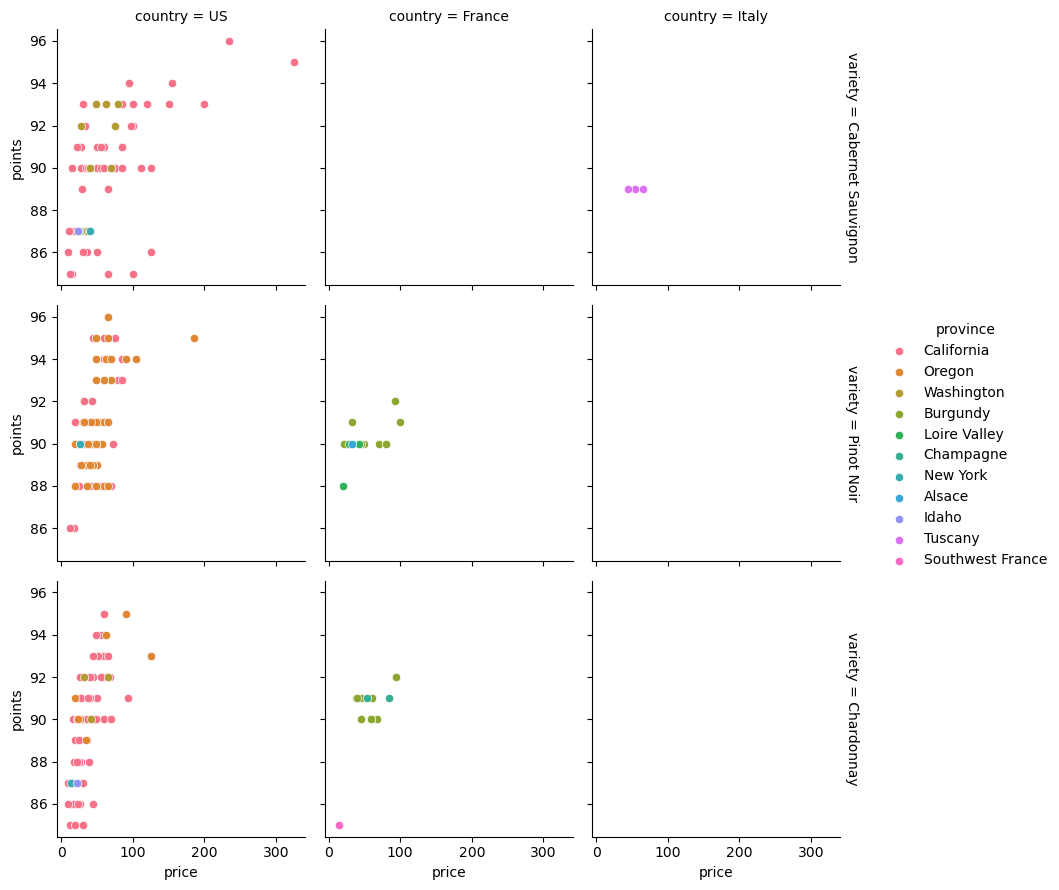

In [35]:
plt.figure()
fg = sns.FacetGrid(country_df, row='variety', col='country', hue='province', margin_titles=True)
fg.map(sns.scatterplot, 'price', 'points')
fg.add_legend()
plt.show()
plt.close()

From this grid we can see that the US by far produces the most wine, and produces the most of each three varieties. France seems to only produce Chardonnay and Pinot Noir and Italy seems to solely produce Cabernet Sauvignon and from only one region in Tuscany. The US produces most of its wine in the states of Oregon and California. France produces most of its wine in the Loire Valley. The US also to appears to produce the most expensive wine (out of these three varieties), being a Cabernet Sauvignon priced at around 300. The US also appears to produce the wines with the highest points.

As we can see from the histogram below Pinot Noir has the highest count of wines with a point score of between 90 and 92. Chardonney has the lowest point score of 85. Cabernet Sauvignon and Chardonnay have the highest points at 96. 

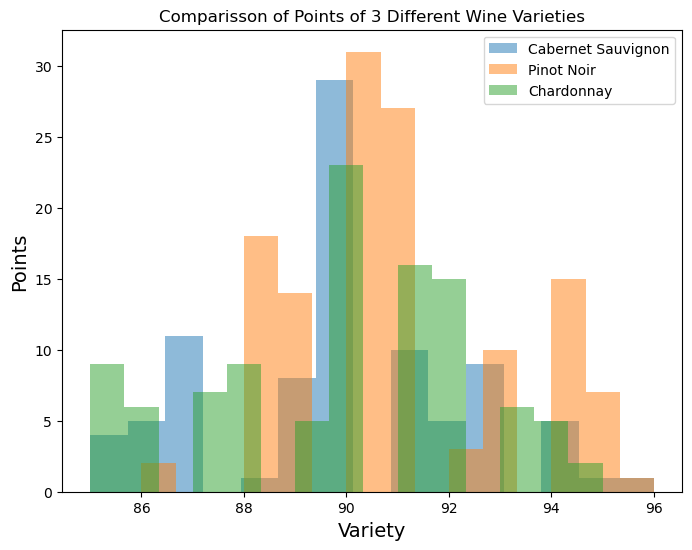

In [36]:
data1 = new_df.loc[new_df.variety=='Cabernet Sauvignon']
data1 = data1['points']
data2 = new_df.loc[new_df.variety=='Pinot Noir']
data2 = data2['points']
data3 = new_df.loc[new_df.variety=='Chardonnay']
data3 = data3['points']
plt.figure(figsize=(8,6))
plt.hist(data1, bins=15, alpha=0.5, label="Cabernet Sauvignon")
plt.hist(data2, bins=15, alpha=0.5, label="Pinot Noir")
plt.hist(data3, bins=15, alpha=0.5, label="Chardonnay")
plt.xlabel("Variety", size=14)
plt.ylabel("Points", size=14)
plt.title("Comparisson of Points of 3 Different Wine Varieties")
plt.legend(loc='upper right')
plt.show()


Let's create a wordcloud showing in which province each variety of wine is produced. First we need to split the dataset into three new sets, one for each of the varieties. 

In [58]:
cabernet = new_df.loc[new_df.variety == 'Cabernet Sauvignon']

pinot = new_df.loc[new_df.variety == 'Pinot Noir']

chardonnay = new_df.loc[new_df.variety == 'Chardonnay']


Wordcloud for provinces where Pinot Noir is Produced.

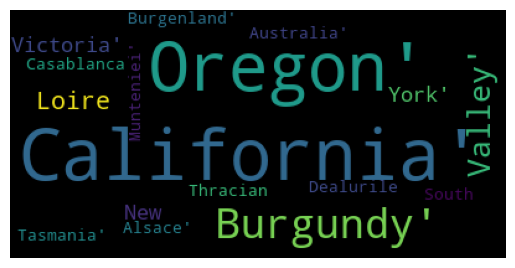

In [60]:
text = pinot['province'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Wordcloud for provinces where Cabernet Sauvignon is produced. 

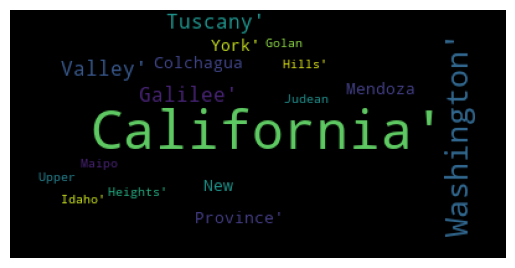

In [59]:
text = cabernet['province'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Wordcloud for provinces where Chardonnay is produced.

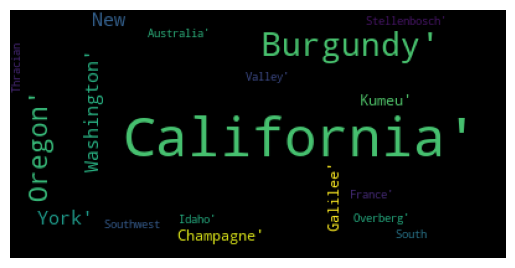

In [61]:
text = chardonnay['province'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

It seems that for those three varieties of wine, they are all mainly produced in California. 

# Let's have a look at the top 5 countries with the highest average points and price 

In [69]:
country = wine.groupby("country")
country.mean().sort_values(by="points",ascending=False).head()


,points,price
country,,
New Zealand,94.000000,57.000000
Austria,93.000000,43.750000
Morocco,93.000000,35.000000
Hungary,91.000000,25.500000
Germany,90.518519,27.777778


Interestinly New Zealand, on average, produces the highest rated wines.

Let's see which country produces the largest number of wines. 

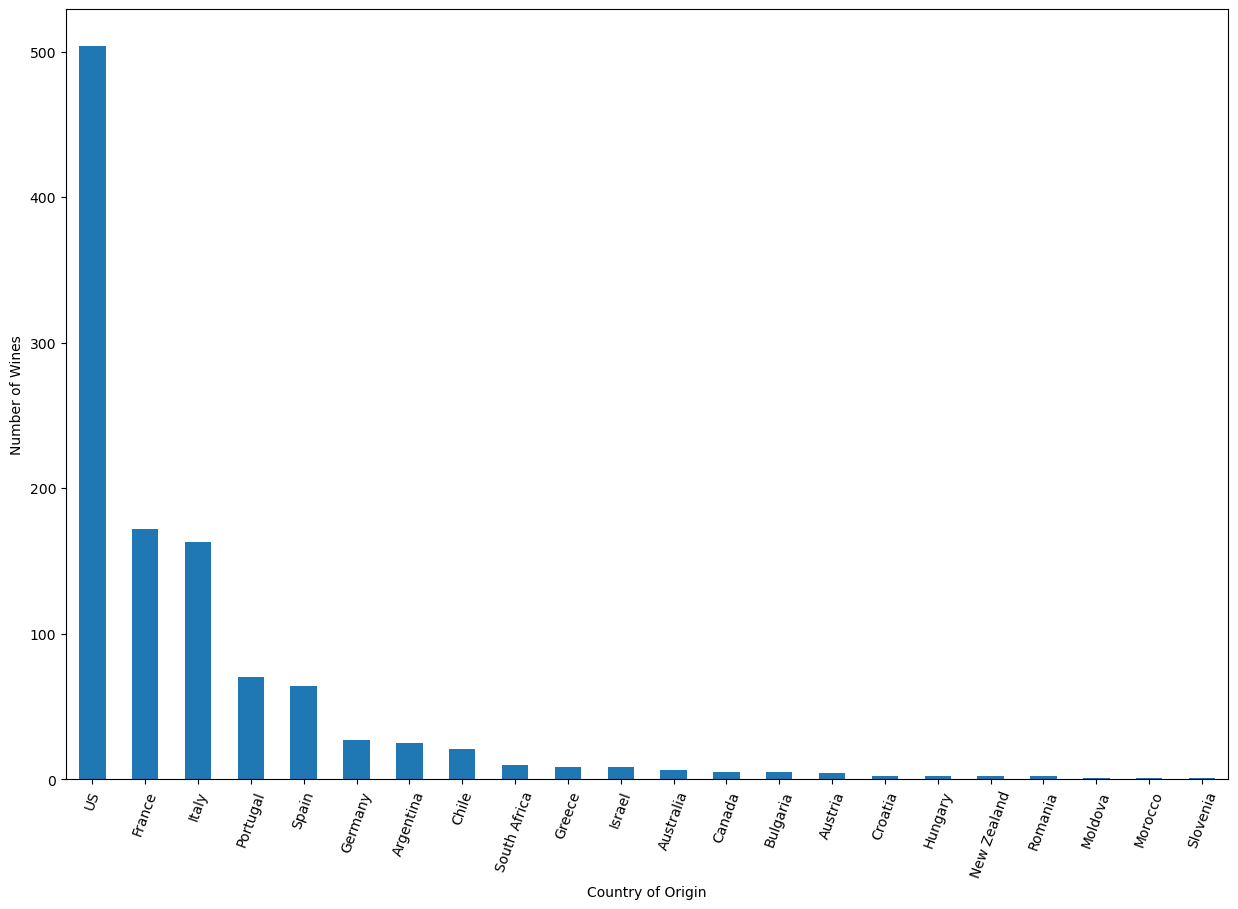

In [73]:
plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=70)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")
plt.show()

According to this dataset the US produces the most wines. 